In [5]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ------------------- -------------------- 307.2/626.3 kB 9.6 MB/s eta 0:00:01
   ----------------------------------- ---- 553.0/626.3 kB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud


   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 163.8 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.4 kB 196.9 kB/s eta 0:00:02
   --------------- ---------------------- 122.9/301.4 kB 516.7 kB/s eta 0:00:01
   ------------------------------------ --- 276.5/301.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 983.6 kB/s eta 0:00:00


In [4]:
pip install nltk


     ---------------------------------------- 0.0/41.9 kB ? eta -:--:--
     ---------------------------------------- 41.9/41.9 kB 2.1 MB/s eta 0:00:00
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
   ---------------------------------------- 0.0/268.5 kB ? eta -:--:--
   ------------------------- -------------- 174.1/268.5 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 268.5/268.5 kB 4.2 MB/s eta 0:00:00


In [2]:
pip install kaggle


     -------------------------------------- 79.7/79.7 kB 342.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102982 sha256=d592a14a16523d870b42d0e46b5808dc831862d4f101f330d5f4b31960c0cf8b
  Stored in directory: c:\users\karti\appdata\local\pip\cache\wheels\f3\eb\e9\819c2d9eac90204eec8579430759f75a1d6dbe4cd0b93f53bc
Successfully built kaggle


In [3]:
import kaggle
!kaggle competitions download -c nlp-getting-started


  0%|          | 0.00/593k [00:00<?, ?B/s]
100%|██████████| 593k/593k [00:01<00:00, 364kB/s]
100%|██████████| 593k/593k [00:01<00:00, 364kB/s]


In [5]:
import zipfile
zip = zipfile.ZipFile('nlp-getting-started.zip')
zip.extractall()
zip.close

<bound method ZipFile.close of <zipfile.ZipFile filename='nlp-getting-started.zip' mode='r'>>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from scipy.stats import probplot
from matplotlib.ticker import MaxNLocator

from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
import spacy
import emoji
import regex as re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [14]:
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet2022 to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet2022.zip.


True

In [2]:
nlp = spacy.load("en_core_web_sm")

In [18]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\karti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

# Read Files

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
from skimpy import skim
skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7613   │ │ string      │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ id               │    0 │       0 │   5400 │   3100 │    1 │   2700 │   5400 │   8100 │   11000 │  ▇▇▇▇▇▇  │  │
│ │ target           │    0 │       0 │   0.43 │    0.5 │    0 │      0 │      0 │      1 │       1 │  ▇    ▆  │  │
│ └──────────────────┴──────┴─────────┴────────┴────────┴──────┴────────┴────────┴────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %         ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ keyword                  │         61 │          0.8 │                       0.99 │                   7552 │  │
│ │ location                 │       2533 │        33.27 │                        1.5 │                  11248 │  │
│ │ text                     │          0 │            0 │                         15 │                 113654 │  │
│ └──────────────────────────┴────────────┴──────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
datasets = {'train': train, 'test': test}

for name, i in datasets.items():
    print(f'Unique Locations in {name}: {i['location'].nunique()}')
    print(f'shape of {name} : {i.shape}')

Unique Locations in train: 3341
shape of train : (7613, 5)
Unique Locations in test: 1602
shape of test : (3263, 4)


In [8]:
for name, i in datasets.items():
    print(f'Unique Locations in {name}: {i.isnull().sum()}')

Unique Locations in train: id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Unique Locations in test: id             0
keyword       26
location    1105
text           0
dtype: int64


In [9]:
train.duplicated().sum()

0

# EDA

In [10]:
train['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

## Target Distribution

In [11]:
train[train['target']==1].count()

id          3271
keyword     3229
location    2196
text        3271
target      3271
dtype: int64

In [12]:
train[train['target']==0].count()

id          4342
keyword     4323
location    2884
text        4342
target      4342
dtype: int64

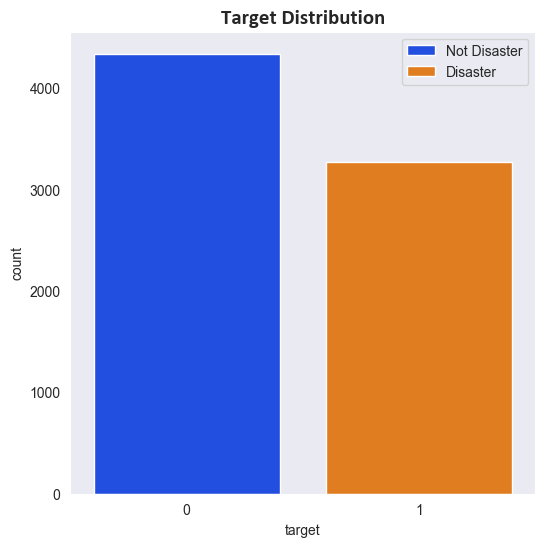

In [67]:
fontdict= {'fontname': 'Calibri', 'fontsize': 15, 'fontweight': 'bold'}
plt.figure(figsize=(6,6))
sns.countplot(x= 'target', data=train, palette='bright')
plt.legend(labels = ['Not Disaster', 'Disaster'])
plt.title("Target Distribution", fontdict=fontdict)
plots.append(plt.gcf()) 


In [70]:
plt.figure(figsize=(10,6))
sns.set_style('dark')
color_palette = sns.color_palette("inferno", n_colors=len(train['keyword'].value_counts().iloc[:25].index))
sns.countplot(y = 'keyword', data =train, order=train['keyword'].value_counts().iloc[:25].index, palette=color_palette)
plt.title('Top 25 words', fontdict=fontdict)
plt.xlabel('Count of Words')
plt.ylabel('KeyWords')

KeyError: 'keyword'

<Figure size 1000x600 with 0 Axes>

In [79]:
plt.figure(figsize=(10,6))
sns.set_style('dark')
color_palette = sns.color_palette("Set2", n_colors=len(train['location'].value_counts().iloc[:25].index))
sns.countplot(y = 'location', data =train, order=train['location'].value_counts().iloc[:25].index, palette=color_palette)
plt.title('Top 25 Location', fontdict=fontdict)
plt.xlabel('Count of Location')
plt.ylabel('KeyWords')



KeyError: 'location'

<Figure size 1000x600 with 0 Axes>

## WordCloud

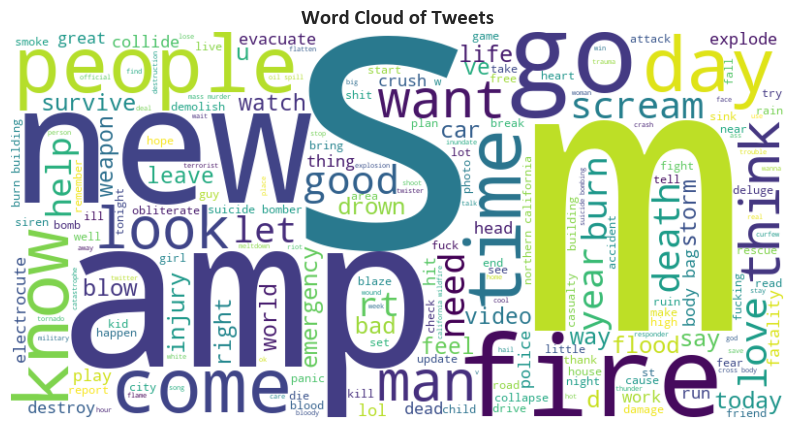

In [71]:
from wordcloud import WordCloud

text_combined = ' '.join(text for text in train.text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Tweets', fontdict= fontdict)
plt.axis('off')
plots.append(plt.gcf()) 


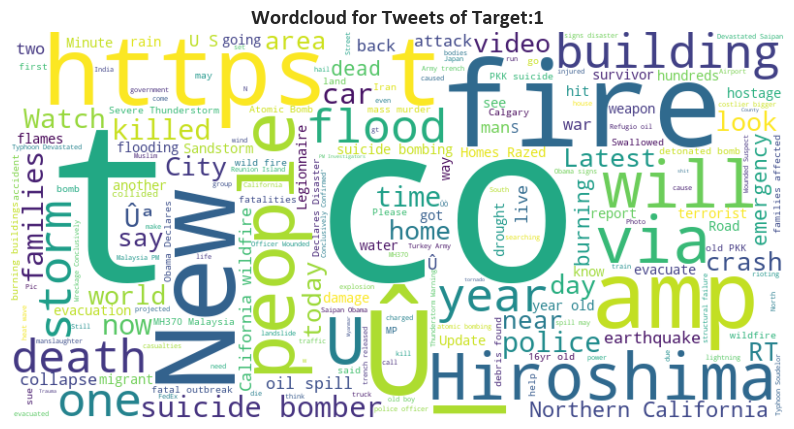

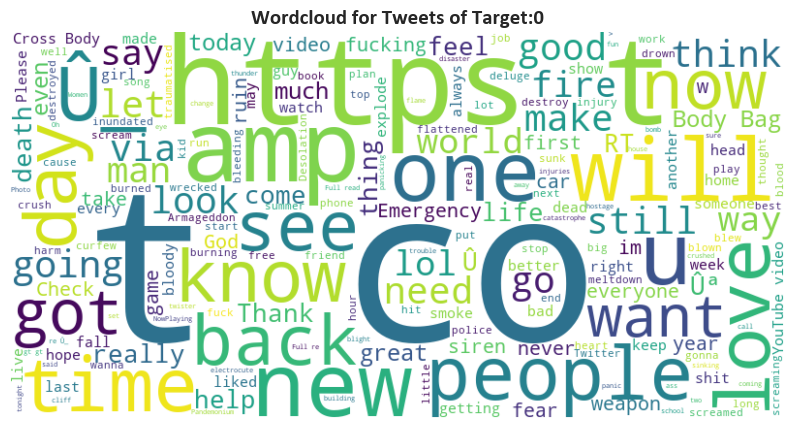

In [17]:
targets = train['target'].unique()


for target in targets:
    text_combined = " ".join(text for text in train[train['target'] == target]['text'])
    wordcloud = WordCloud(width=800, height= 400, background_color='white').generate(text_combined)

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Wordcloud for Tweets of Target:' + str(target), fontdict= fontdict)

In [18]:
targets = train['target'].unique()
targets

array([1, 0], dtype=int64)

## Most Common words

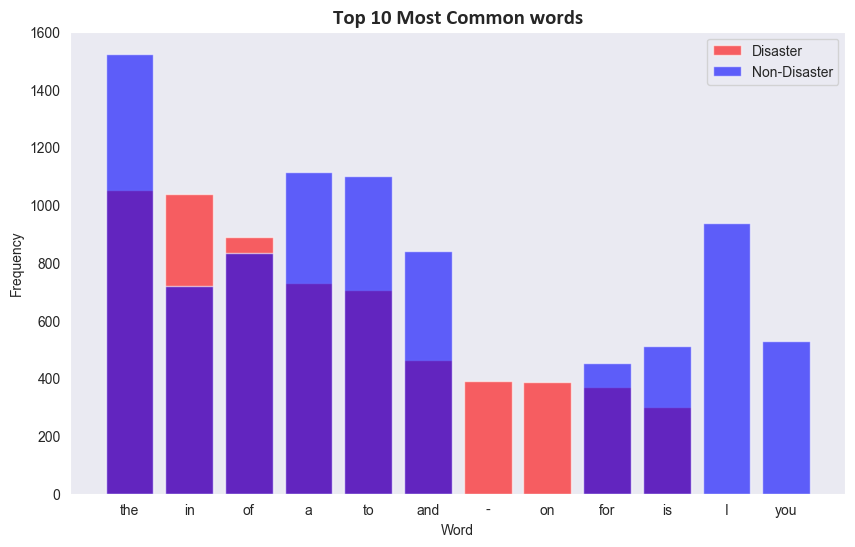

In [19]:
disaster_tweets = train[train['target'] ==1]['text'].str.split().sum()
non_disaster_tweets = train[train['target'] ==0]['text'].str.split().sum()

disaster_word_freq = Counter(disaster_tweets)
non_disaster_word_freq = Counter(non_disaster_tweets)

plt.figure(figsize=(10,6))
plt.bar(*zip(*disaster_word_freq.most_common(10)), color='red', alpha=0.6, label='Disaster')
plt.bar(*zip(*non_disaster_word_freq.most_common(10)), color = 'blue', alpha = 0.6, label = 'Non-Disaster')
plt.title('Top 10 Most Common words', fontdict= fontdict)
plt.ylabel('Frequency')
plt.xlabel('Word')
plt.legend()

## Keyword Distribution by target

Text(0, 0.5, 'Keyword')

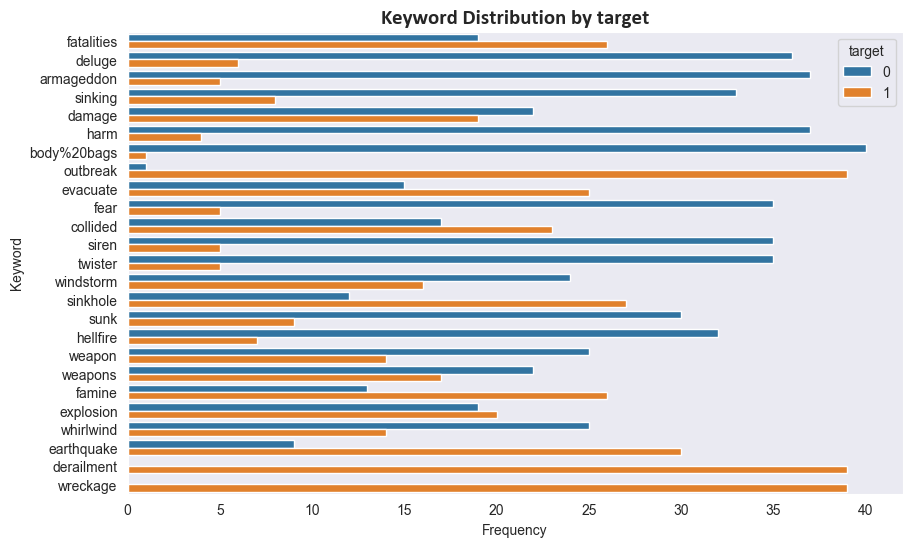

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(y = 'keyword', hue='target', data = train, order= train['keyword'].value_counts().iloc[:25].index)
plt.title('Keyword Distribution by target', fontdict= fontdict)
plt.xlabel('Frequency')
plt.ylabel('Keyword')


## Location distribution of target 

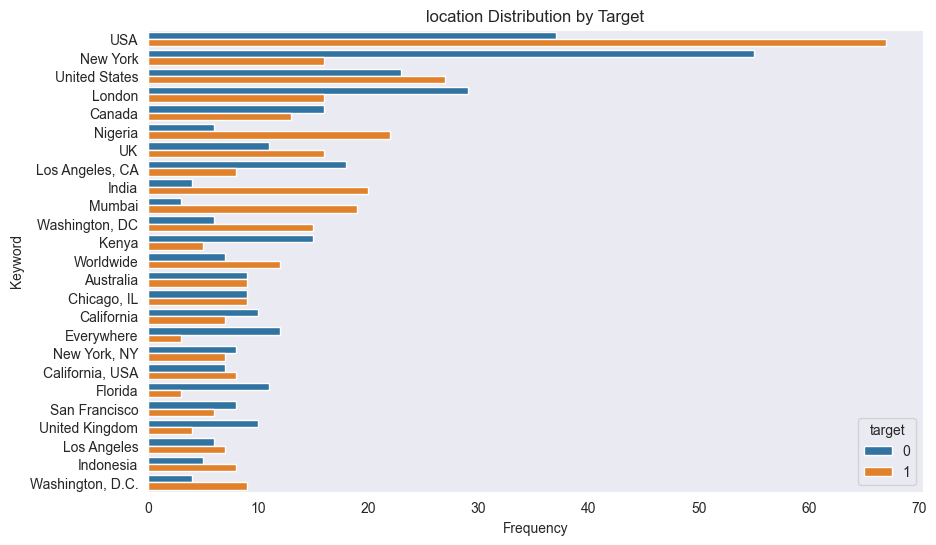

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(y='location', hue='target', data=train, order=train['location'].value_counts().iloc[:25].index,palette='tab10')
plt.title('location Distribution by Target')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

# Data Preprocessing

In [22]:
def preprocess_text(text):
    # Remove mentions (@)
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags (#)
    text = re.sub(r'#\w+', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    return text

In [23]:
preprocess_text('https://www.kaggle.com/code/zinebelhouz/nlp-with-disaster-tweets-beginner-friendly/notebook#RNN')

''

In [24]:
def preprocess_nlp_text_stem(text):
    text = preprocess_text(text)
    text = text.lower()

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    processed_text = ' '.join(tokens)
    return processed_text

In [25]:
preprocess_nlp_text_stem('@kartikmention is in an earthquake,#hastag URL : https://www.kaggle.com')

'earthquak url'

In [26]:
def preprocess_nlp_text_lemma(text):
    text = preprocess_text(text)
    text = text.lower()
    
    tokens = word_tokenize(text)
    tokens = [re.sub(r'[^a-zA-Z0-9]', '', token) for token in tokens if token.strip()]
    
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    pos_tags = []
    for token in tokens:
        if token:
            pos_tags.append(nltk.pos_tag([token])[0])
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for token, pos in pos_tags:
        pos = pos[0].lower()  
        pos = pos if pos in ['a', 's', 'r', 'n', 'v'] else 'n' 
        lemmatized_token = lemmatizer.lemmatize(token, pos=pos)
        lemmatized_tokens.append(lemmatized_token)
    
    # Join tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

In [27]:
preprocess_nlp_text_lemma('@kartikmention is in an earthquake,#hastag URL : https://www.kaggle.com')

'earthquake url'

In [28]:
def preprocess_nlp_text_spicy(text):
    
    text = preprocess_text(text)
    text = text.lower()
    
    text = emoji.demojize(text)
    doc = nlp(text)
    
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop]
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

In [29]:
preprocess_nlp_text_spicy('@kartikmention is in an earthquake,#hastag URL : https://www.kaggle.com')

'  earthquake url  '

# Spacy based pre-processing

In [30]:
train['text'] = [preprocess_nlp_text_spicy(text) for text in train['text']]

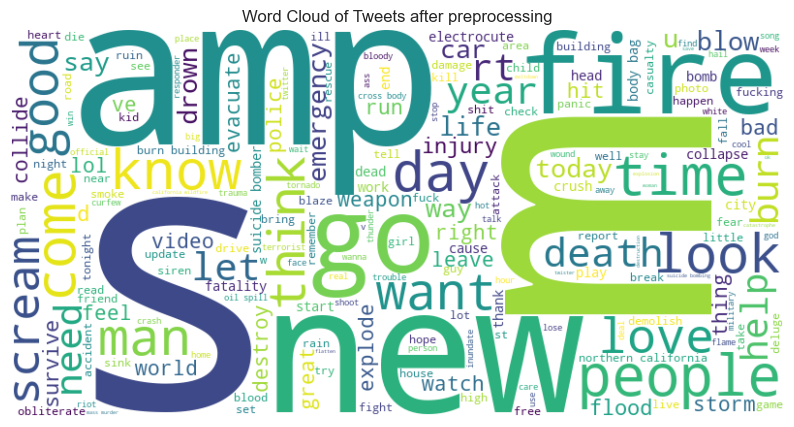

In [31]:
from wordcloud import WordCloud

text_combined = " ".join(text for text in train.text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets after preprocessing')
plt.show()

In [32]:
test['text'] = [preprocess_nlp_text_spicy(text) for text in test['text']]

# Split Data

In [33]:
train.drop(['id', 'keyword', 'location'], axis=1, inplace=True)
test.drop(['id', 'keyword', 'location'], axis=1, inplace=True)

In [34]:
X_train = train.drop("target", axis = 1)
y_train = train["target"]
X_test = test

In [35]:
X_test

,text
0,happen terrible car crash
1,hear different city stay safe
2,forest fire spot pond geese flee street save
3,apocalypse light
4,typhoon soudelor kill china taiwan
...,...
3258,earthquake safety los angeles safety fastene...
3259,storm ri worse hurricane cityampother hard hit...
3260,green line derailment chicago
3261,meg issue hazardous weather outlook hwo


# Build Model

In [36]:
nb = MultinomialNB(alpha = 0.1)

## Vectorization with TF-IDF

In [37]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train['text'])
X_test_tfidf = tfidf.fit_transform(X_test['text'])

In [38]:
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("X_train shape:", X_train.shape)

X_train_tfidf shape: (7613, 11093)
X_train shape: (7613, 1)


In [41]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []

for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_train_tfidf, y_train)):
    print(f'Training Model for Fold {fold+1}')

    X_fold_train, X_fold_test = X_train_tfidf[train_index], X_train_tfidf[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index] , y_train.iloc[test_index]

    nb.fit(X_fold_train, y_fold_train)
    predictions = nb.predict(X_fold_test)

    f1 = f1_score(y_fold_test, predictions)
    f1_scores.append(f1)
    print(f'Fold{fold+1} F1-score : {f1}')

print()
print(f"Average F1-score across all folds: {np.mean(f1_scores)}")

Training Model for Fold 1
Fold1 F1-score : 0.7421686746987952
Training Model for Fold 2
Fold2 F1-score : 0.7531847133757962
Training Model for Fold 3
Fold3 F1-score : 0.7240829346092504
Training Model for Fold 4
Fold4 F1-score : 0.7256347256347256
Training Model for Fold 5
Fold5 F1-score : 0.7389558232931727

Average F1-score across all folds: 0.7368053743223479


## Vectorization with CountVectorizer

In [44]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['text'])
X_test_vectorized  = vectorizer.transform(X_test['text'])

In [45]:
print("X_train_tfidf shape:", X_test_vectorized.shape)
print("X_train shape:", X_test.shape)

X_train_tfidf shape: (3263, 11093)
X_train shape: (3263, 1)


In [47]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []

for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_train_vectorized, y_train)):
    print(f"Training model for Fold {fold+1}")
    
    X_fold_train, X_fold_test = X_train_vectorized[train_index], X_train_vectorized[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    nb.fit(X_fold_train, y_fold_train)
    
    predictions = nb.predict(X_fold_test)
    
    f1 = f1_score(y_fold_test, predictions)
    
    f1_scores.append(f1)

    
    f1_scores.append(f1)
    print(f"Fold {fold+1} F1-score: {f1}")

# Display average F1-score across folds
print()
print(f"Average F1-score across folds: {np.mean(f1_scores)}")

Training model for Fold 1
Fold 1 F1-score: 0.7452830188679245
Training model for Fold 2
Fold 2 F1-score: 0.7535321821036107
Training model for Fold 3
Fold 3 F1-score: 0.7149532710280374
Training model for Fold 4
Fold 4 F1-score: 0.7287319422150883
Training model for Fold 5
Fold 5 F1-score: 0.7406819984139572

Average F1-score across folds: 0.7366364825257236


## XGBoost

In [48]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()

In [49]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []

for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_train_tfidf, y_train)):
    print(f"Training model for Fold {fold+1}")
    
    X_fold_train, X_fold_test = X_train_tfidf[train_index], X_train_tfidf[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    xgb.fit(X_fold_train, y_fold_train)
    
    predictions = xgb.predict(X_fold_test)
    
    f1 = f1_score(y_fold_test, predictions)
    
    f1_scores.append(f1)

    
    f1_scores.append(f1)
    print(f"Fold {fold+1} F1-score: {f1}")

# Display average F1-score across folds
print()
print(f"Average F1-score across folds: {np.mean(f1_scores)}")

Training model for Fold 1
Fold 1 F1-score: 0.35705669481302776
Training model for Fold 2
Fold 2 F1-score: 0.3877068557919622
Training model for Fold 3
Fold 3 F1-score: 0.3046192259675406
Training model for Fold 4
Fold 4 F1-score: 0.3132832080200501
Training model for Fold 5
Fold 5 F1-score: 0.37889688249400477

Average F1-score across folds: 0.34831257341731703


In [51]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []

for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_train_vectorized, y_train)):
    print(f"Training model for Fold {fold+1}")
    
    X_fold_train, X_fold_test = X_train_vectorized[train_index], X_train_vectorized[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    xgb.fit(X_fold_train, y_fold_train)
    
    predictions = xgb.predict(X_fold_test)
    
    f1 = f1_score(y_fold_test, predictions)
    
    f1_scores.append(f1)
    print(f"Fold {fold+1} F1-score: {f1}")

# Display average F1-score across folds
print()
print(f"Average F1-score across folds: {np.mean(f1_scores)}")

Training model for Fold 1
Fold 1 F1-score: 0.36494597839135656
Training model for Fold 2
Fold 2 F1-score: 0.3862559241706161
Training model for Fold 3
Fold 3 F1-score: 0.31722428748451054
Training model for Fold 4
Fold 4 F1-score: 0.3107769423558897
Training model for Fold 5
Fold 5 F1-score: 0.3743961352657005

Average F1-score across folds: 0.3507198535336147


In [56]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [58]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['text'])

X_train_seq = tokenizer.texts_to_sequences(X_train['text'])
X_test_seq = tokenizer.texts_to_sequences(X_test["text"])

max_seq_length = 120
X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_length)

In [59]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 120 

In [60]:
vocab_size

11117

In [61]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Define the number of folds for cross-validation
num_folds = 5
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define lists to store evaluation metrics
accuracy_scores = []
f1_scores = []


# Perform k-fold cross-validation
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train_padded, y_train)):
    print(f"Training model for Fold {fold+1}")
    
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_padded[train_indices], X_train_padded[val_indices]
    y_train_fold, y_val_fold = y_train[train_indices], y_train[val_indices]
    
    # Build RNN model
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))
    model.add(LSTM(units=128))
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

     # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=64, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Evaluate performance on the validation set
    loss, accuracy = model.evaluate(X_val_fold, y_val_fold)
    accuracy_scores.append(accuracy)

    # Make predictions on the validation set
    y_val_pred_probs = model.predict(X_val_fold)
    y_val_pred = (y_val_pred_probs > 0.5).astype(int)

    # Calculate F1-score
    f1 = f1_score(y_val_fold, y_val_pred)
    f1_scores.append(f1)

    print(f"Fold {fold+1} - Accuracy: {accuracy}, F1-score: {f1}")

# Print average evaluation metrics across folds
print()
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average F1-score:", np.mean(f1_scores))

Training model for Fold 1
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7729 - loss: 0.7020
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
Fold 1 - Accuracy: 0.7616546154022217, F1-score: 0.7209838585703305
Training model for Fold 2
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8008 - loss: 0.6205
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step
Fold 2 - Accuracy: 0.7839789986610413, F1-score: 0.7344632768361582
Training model for Fold 3
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7540 - loss: 0.7637
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step
Fold 3 - Accuracy: 0.7478660345077515, F1-score: 0.7027863777089783
Training model for Fold 4
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6772 - loss: 0.7957
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
Fold 4 - Accuracy: 0.6826543807983398, F1-score: 0.6873786407766991
Training model for Fold 5
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7342 - loss: 0.7796
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step
Fold 5 - Accuracy: 0.7503285

# Predictions

In [62]:
predictions = model.predict(X_test_padded)
predictions = (predictions>0.5).astype(int)

102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


In [63]:
submission_df = pd.read_csv('sample_submission.csv')
submission_df['target'] = predictions

In [64]:
submission_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [65]:
submission_df.to_csv('nlp-final-submission.csv', index= False)

In [80]:
plots

[<Figure size 600x600 with 1 Axes>, <Figure size 1000x600 with 1 Axes>]

In [81]:
for i, plot in enumerate(plots):
    plot.savefig(f'plot_{i + 1}.png')
plt.close('all')

In [84]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('plots.pdf') as pdf:
    for i, plot in enumerate(plots):
        pdf.savefig(plot)  
        plt.close() 

print("Plots saved to 'plots.pdf'")


Plots saved to 'plots.pdf'


In [83]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model, f)